In [8]:
import qiskit

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister



from qiskit import IBMQ
from qiskit import Aer,BasicAer, execute, assemble
from qiskit.providers.aer import AerSimulator

import qiskit.providers.aer.noise as noise
from qiskit.providers.aer.noise import NoiseModel, amplitude_damping_error,phase_damping_error



# Needed for functions
import time
from copy import deepcopy
import numpy as np
from numpy import pi

import matplotlib as mpl
import matplotlib.pyplot as plt

from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit.visualization import plot_bloch_multivector

import qiskit.quantum_info as qi
from qiskit.quantum_info import state_fidelity
from qiskit.quantum_info import partial_trace, Statevector

# Tomography functions
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.ignis.verification.tomography import process_tomography_circuits, ProcessTomographyFitter
from qiskit.ignis.verification.tomography import gateset_tomography_circuits, GatesetTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

In [2]:
### T- CLUSTER


In [3]:
qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)

circuit.rx(pi/2, qreg_q[0])
# circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[1])
circuit.cx(qreg_q[4], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
# circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.rx(-pi/2, qreg_q[4])

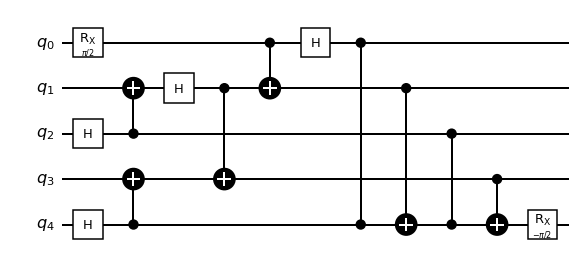

In [4]:
circuit.draw('mpl',style='bw')

In [5]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_qasm_simulator')

In [6]:
qpt_circs = process_tomography_circuits(circuit, qreg_q[4], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'0': 2007, '1': 1993},
 (('Zp',), ('Y',)): {'0': 1989, '1': 2011},
 (('Zp',), ('Z',)): {'0': 4000},
 (('Zm',), ('X',)): {'0': 2022, '1': 1978},
 (('Zm',), ('Y',)): {'0': 1992, '1': 2008},
 (('Zm',), ('Z',)): {'1': 4000},
 (('Xp',), ('X',)): {'0': 4000},
 (('Xp',), ('Y',)): {'0': 1991, '1': 2009},
 (('Xp',), ('Z',)): {'0': 2015, '1': 1985},
 (('Yp',), ('X',)): {'0': 2005, '1': 1995},
 (('Yp',), ('Y',)): {'0': 4000},
 (('Yp',), ('Z',)): {'0': 1958, '1': 2042}}

In [7]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.002792835235595703
Average gate fidelity: F = 0.99716


In [8]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

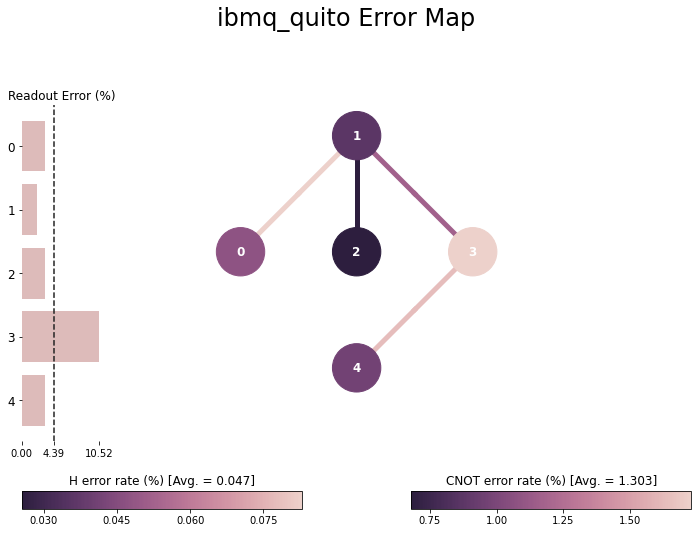

In [9]:
backend = provider.get_backend('ibmq_quito') 
qiskit.visualization.plot_error_map(backend)

In [10]:
qpt_circs = process_tomography_circuits(circuit, qreg_q[4], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'0': 2080, '1': 1920},
 (('Zp',), ('Y',)): {'0': 2157, '1': 1843},
 (('Zp',), ('Z',)): {'0': 1886, '1': 2114},
 (('Zm',), ('X',)): {'0': 2034, '1': 1966},
 (('Zm',), ('Y',)): {'0': 2005, '1': 1995},
 (('Zm',), ('Z',)): {'0': 2076, '1': 1924},
 (('Xp',), ('X',)): {'0': 1842, '1': 2158},
 (('Xp',), ('Y',)): {'0': 2039, '1': 1961},
 (('Xp',), ('Z',)): {'0': 1938, '1': 2062},
 (('Yp',), ('X',)): {'0': 2021, '1': 1979},
 (('Yp',), ('Y',)): {'0': 2606, '1': 1394},
 (('Yp',), ('Z',)): {'0': 2008, '1': 1992}}

In [11]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.004724264144897461
Average gate fidelity: F = 0.51792


In [12]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

In [ ]:
# CHAIN CLUSTER

In [15]:
qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)


circuit.rx(pi/2, qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[3])

circuit.cz(qreg_q[0], qreg_q[4])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cx(qreg_q[2], qreg_q[4])
circuit.cz(qreg_q[3], qreg_q[4])



circuit.rx(-pi/2, qreg_q[4])


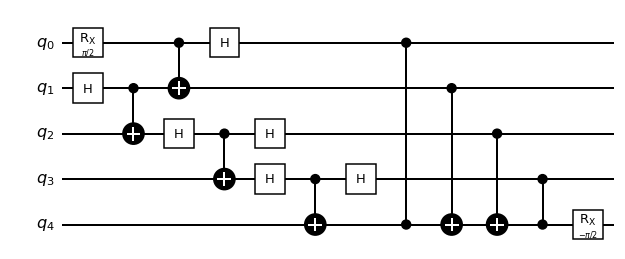

In [16]:
circuit.draw('mpl',style='bw')

In [17]:
backend = provider.get_backend('ibmq_qasm_simulator')

In [18]:
qpt_circs = process_tomography_circuits(circuit, qreg_q[4], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'0': 1963, '1': 2037},
 (('Zp',), ('Y',)): {'0': 1978, '1': 2022},
 (('Zp',), ('Z',)): {'0': 4000},
 (('Zm',), ('X',)): {'0': 2009, '1': 1991},
 (('Zm',), ('Y',)): {'0': 1988, '1': 2012},
 (('Zm',), ('Z',)): {'1': 4000},
 (('Xp',), ('X',)): {'0': 4000},
 (('Xp',), ('Y',)): {'0': 2020, '1': 1980},
 (('Xp',), ('Z',)): {'0': 1969, '1': 2031},
 (('Yp',), ('X',)): {'0': 1941, '1': 2059},
 (('Yp',), ('Y',)): {'0': 4000},
 (('Yp',), ('Z',)): {'0': 2073, '1': 1927}}

In [19]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.003999471664428711
Average gate fidelity: F = 0.99788


In [20]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

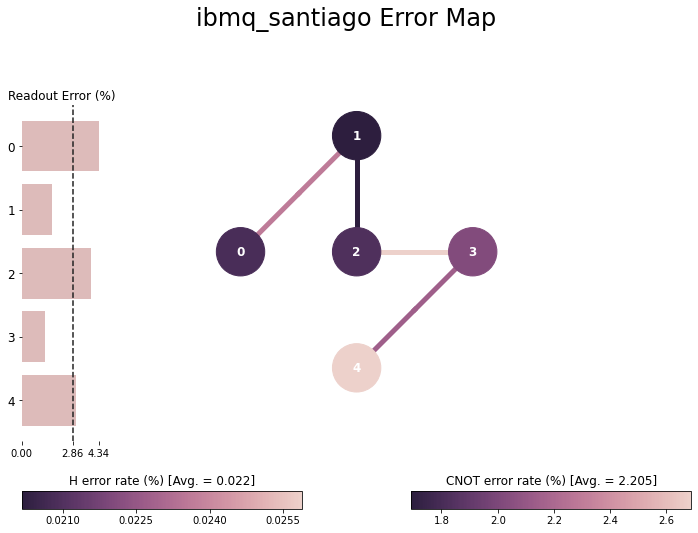

In [21]:
backend = provider.get_backend('ibmq_santiago') 
qiskit.visualization.plot_error_map(backend)

In [22]:
qpt_circs = process_tomography_circuits(circuit, qreg_q[4], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'0': 1884, '1': 2116},
 (('Zp',), ('Y',)): {'0': 1977, '1': 2023},
 (('Zp',), ('Z',)): {'0': 2343, '1': 1657},
 (('Zm',), ('X',)): {'0': 2007, '1': 1993},
 (('Zm',), ('Y',)): {'0': 1781, '1': 2219},
 (('Zm',), ('Z',)): {'0': 1770, '1': 2230},
 (('Xp',), ('X',)): {'0': 2540, '1': 1460},
 (('Xp',), ('Y',)): {'0': 2529, '1': 1471},
 (('Xp',), ('Z',)): {'0': 2288, '1': 1712},
 (('Yp',), ('X',)): {'0': 1995, '1': 2005},
 (('Yp',), ('Y',)): {'0': 2694, '1': 1306},
 (('Yp',), ('Z',)): {'0': 2022, '1': 1978}}

In [23]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.00624394416809082
Average gate fidelity: F = 0.64133


In [24]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

In [25]:
# GHZ

In [26]:
qreg_q = QuantumRegister(5, 'q')
circuit = QuantumCircuit(qreg_q)

circuit.rx(pi/2, qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[3])
circuit.cx(qreg_q[1], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
# circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[4])
circuit.rx(-pi/2, qreg_q[4])


In [27]:
backend = provider.get_backend('ibmq_qasm_simulator')

In [28]:
qpt_circs = process_tomography_circuits(circuit, qreg_q[4], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'0': 1981, '1': 2019},
 (('Zp',), ('Y',)): {'0': 2012, '1': 1988},
 (('Zp',), ('Z',)): {'0': 4000},
 (('Zm',), ('X',)): {'0': 2003, '1': 1997},
 (('Zm',), ('Y',)): {'0': 2002, '1': 1998},
 (('Zm',), ('Z',)): {'1': 4000},
 (('Xp',), ('X',)): {'0': 4000},
 (('Xp',), ('Y',)): {'0': 1963, '1': 2037},
 (('Xp',), ('Z',)): {'0': 1959, '1': 2041},
 (('Yp',), ('X',)): {'0': 2034, '1': 1966},
 (('Yp',), ('Y',)): {'0': 4000},
 (('Yp',), ('Z',)): {'0': 2024, '1': 1976}}

In [29]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.0035104751586914062
Average gate fidelity: F = 0.99727


In [30]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

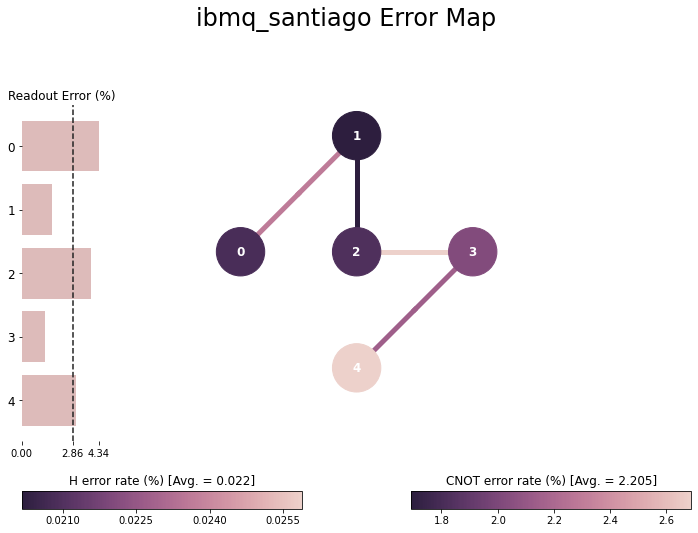

In [31]:
backend = provider.get_backend('ibmq_santiago') 
qiskit.visualization.plot_error_map(backend)

In [32]:
qpt_circs = process_tomography_circuits(circuit, qreg_q[4], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'0': 2156, '1': 1844},
 (('Zp',), ('Y',)): {'0': 2228, '1': 1772},
 (('Zp',), ('Z',)): {'0': 2036, '1': 1964},
 (('Zm',), ('X',)): {'0': 1881, '1': 2119},
 (('Zm',), ('Y',)): {'0': 1920, '1': 2080},
 (('Zm',), ('Z',)): {'0': 1857, '1': 2143},
 (('Xp',), ('X',)): {'0': 2022, '1': 1978},
 (('Xp',), ('Y',)): {'0': 2537, '1': 1463},
 (('Xp',), ('Z',)): {'0': 1857, '1': 2143},
 (('Yp',), ('X',)): {'0': 1850, '1': 2150},
 (('Yp',), ('Y',)): {'0': 2132, '1': 1868},
 (('Yp',), ('Z',)): {'0': 1995, '1': 2005}}

In [33]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.0029740333557128906
Average gate fidelity: F = 0.51258


In [34]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

In [3]:
qreg_q = QuantumRegister(2, 'q')
circuit = QuantumCircuit(qreg_q)

circuit.cx(qreg_q[0],qreg_q[1])
circuit.cx(qreg_q[1],qreg_q[0])
circuit.cx(qreg_q[0],qreg_q[1])

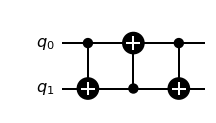

In [4]:
circuit.draw('mpl',style='bw')

In [11]:
# provider = IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

In [14]:
qpt_circs = process_tomography_circuits(circuit, qreg_q[1], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'1': 2028, '0': 1972},
 (('Zp',), ('Y',)): {'1': 2011, '0': 1989},
 (('Zp',), ('Z',)): {'0': 4000},
 (('Zm',), ('X',)): {'1': 1984, '0': 2016},
 (('Zm',), ('Y',)): {'1': 1946, '0': 2054},
 (('Zm',), ('Z',)): {'1': 4000},
 (('Xp',), ('X',)): {'0': 4000},
 (('Xp',), ('Y',)): {'0': 2004, '1': 1996},
 (('Xp',), ('Z',)): {'0': 1951, '1': 2049},
 (('Yp',), ('X',)): {'1': 1993, '0': 2007},
 (('Yp',), ('Y',)): {'0': 4000},
 (('Yp',), ('Z',)): {'1': 1971, '0': 2029}}

In [15]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.012454032897949219
Average gate fidelity: F = 0.99535


In [16]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

In [17]:
noise_model = noise.NoiseModel()
for qubit in range(2):
    read_err = noise.errors.readout_error.ReadoutError([[0.75, 0.25],[0.1,0.9]])
    noise_model.add_readout_error(read_err,[qubit])
# Параметры ошибки деполяризации
# Вероятности ошибки
prob_1gate = 0.001  # Однокубитный гейт
prob_2gate = 0.1   # Двухкубитный гейт

# Ошибки деполяризации
error_1 = noise.depolarizing_error(prob_1gate, 1)
error_2 = noise.depolarizing_error(prob_2gate, 2)
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

In [18]:

qpt_circs = process_tomography_circuits(circuit, qreg_q[1], prepared_qubits=qreg_q[0])
job = qiskit.execute(qpt_circs, backend, shots=4000,noise_model=noise_model)

# Extract tomography data so that counts are indexed by measurement configuration
qpt_tomo = ProcessTomographyFitter(job.result(), qpt_circs)
qpt_tomo.data

{(('Zp',), ('X',)): {'1': 2314, '0': 1686},
 (('Zp',), ('Y',)): {'0': 1653, '1': 2347},
 (('Zp',), ('Z',)): {'1': 1366, '0': 2634},
 (('Zm',), ('X',)): {'1': 2281, '0': 1719},
 (('Zm',), ('Y',)): {'0': 1731, '1': 2269},
 (('Zm',), ('Z',)): {'1': 3247, '0': 753},
 (('Xp',), ('X',)): {'1': 1388, '0': 2612},
 (('Xp',), ('Y',)): {'0': 1687, '1': 2313},
 (('Xp',), ('Z',)): {'1': 2332, '0': 1668},
 (('Yp',), ('X',)): {'1': 2322, '0': 1678},
 (('Yp',), ('Y',)): {'1': 1356, '0': 2644},
 (('Yp',), ('Z',)): {'1': 2291, '0': 1709}}

In [19]:
# Tomographic reconstruction

t = time.time()
choi_fit = qpt_tomo.fit(method='lstsq')
print('Fit time:', time.time() - t)
print('Average gate fidelity: F = {:.5f}'.format(qi.average_gate_fidelity(choi_fit)))

Fit time: 0.003194093704223633
Average gate fidelity: F = 0.73350


In [20]:
qiskit.visualization.array_to_latex(choi_fit)

<IPython.core.display.Latex object>

In [36]:
choi_fit

Choi([[ 0.6585  +0.j      , -0.0785  +0.08675j , -0.006375+0.003875j,
        0.465375-0.004875j],
      [-0.0785  -0.08675j ,  0.3415  +0.j      , -0.010625-0.007375j,
        0.006375-0.003875j],
      [-0.006375-0.003875j, -0.010625+0.007375j,  0.18825 +0.j      ,
       -0.07025 +0.06725j ],
      [ 0.465375+0.004875j,  0.006375+0.003875j, -0.07025 -0.06725j ,
        0.81175 +0.j      ]],
     input_dims=(2,), output_dims=(2,))

In [31]:
ideal = np.zeros((4,4))

In [32]:
ideal[0][0]=1
# ideal[1][1]=1
# ideal[2][2]=1
# ideal[3][3]=1


In [33]:
ideal

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [37]:
rho = choi_fit.dot(ideal)

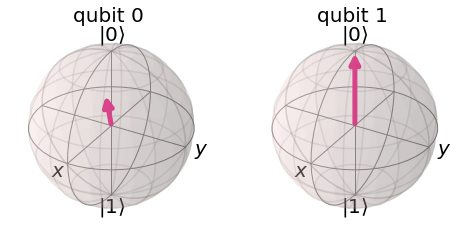

In [39]:
plot_bloch_multivector(rho.data)